<span style="color:green;font-weight:bold">Name : Rashmi Bhaskar 

<span style="color:green;font-weight:bold">Github Username : rashmibhaskar

<span style="color:green;font-weight:bold">USC ID : 4408460333

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from IPython.display import display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import hamming_loss, silhouette_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from collections import defaultdict
from scipy.spatial.distance import hamming 

### 1.Multi-class and Multi-Label Classification Using Support Vector Machines

#### (a)Download the Anuran Calls (MFCCs) Data Set from:https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [7]:
df = pd.read_csv('../data/Frogs_MFCCs.csv')

X = df.iloc[:,:22]
y = df.iloc[:,22:]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=42)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

labels = ['Family', 'Genus', 'Species']

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.438532,-0.148451,-0.260375,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.108483,0.329984,0.274031,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.073050,-0.140994,0.162584,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.404813,-0.075488,-0.320882,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.132244,0.190753,0.126674,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.378497,-0.014091,-0.352985,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.228140,-0.274889,0.244973,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.177708,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.047610,-0.188463,0.102240,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
3340,1.0,0.147506,0.014843,0.433466,0.169581,0.053135,-0.152020,-0.102427,0.153061,0.128628,...,0.341701,0.008463,-0.290680,0.016310,0.285756,0.166246,-0.061206,-0.191878,0.003221,0.255371
5108,1.0,0.674174,0.767520,0.392177,0.035669,0.181548,-0.013677,0.187262,0.144679,-0.424524,...,-0.142909,-0.209932,0.285255,0.103722,-0.157943,-0.048913,-0.016129,0.129200,0.011245,-0.275909
6524,1.0,-0.007777,0.363276,0.413224,0.196296,0.222389,0.097128,-0.155608,-0.035013,0.133689,...,0.016052,-0.028317,-0.102525,-0.005594,0.125169,0.044882,-0.013309,-0.026086,-0.088825,-0.018968
3649,1.0,0.429359,0.297881,0.609120,0.263991,-0.030414,-0.160778,0.076217,0.285909,0.052029,...,0.374639,0.012647,-0.317314,-0.023621,0.230330,0.069015,-0.101196,-0.152351,0.039065,0.233823
1617,1.0,0.190599,0.062234,0.617262,0.208825,0.027108,-0.214441,0.009654,0.299053,0.039013,...,0.402628,-0.110486,-0.306343,0.082182,0.321598,0.128742,-0.152977,-0.223482,0.016131,0.250754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1.0,0.469993,0.342252,0.508362,0.184239,0.138370,-0.070231,0.034221,0.226367,-0.001120,...,0.256172,-0.229460,-0.247905,0.179489,0.186595,-0.080672,-0.104266,-0.077342,0.159712,0.239398
142,1.0,0.162558,-0.115829,0.045608,0.226107,0.325952,0.157953,-0.124050,-0.009148,0.235613,...,-0.318516,0.312135,0.401665,0.120251,-0.120102,-0.226043,-0.161989,0.037390,0.185305,0.059824
1490,1.0,0.160219,0.137078,0.599525,0.252240,0.077200,-0.132288,-0.001605,0.244840,0.081377,...,0.443526,-0.090678,-0.323009,0.082091,0.275059,0.046851,-0.108847,-0.190397,-0.011276,0.217408
2574,1.0,0.523548,0.387887,0.539775,0.087532,0.028962,-0.025403,0.064718,0.215919,-0.005312,...,0.342035,-0.160502,-0.156745,0.175613,0.120708,-0.133983,-0.092651,0.011379,0.109798,0.100649


,Family,Genus,Species,RecordID
2004,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1194,Dendrobatidae,Ameerega,Ameeregatrivittata,13
5359,Hylidae,Hypsiboas,HypsiboasCinerascens,37
1756,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
497,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...
3772,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5191,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5226,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5390,Hylidae,Hypsiboas,HypsiboasCinerascens,37


,Family,Genus,Species,RecordID
3340,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
5108,Hylidae,Hypsiboas,HypsiboasCinerascens,36
6524,Hylidae,Hypsiboas,HypsiboasCordobae,43
3649,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
1617,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
...,...,...,...,...
1224,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,14
142,Leptodactylidae,Adenomera,AdenomeraAndre,4
1490,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
2574,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19


#### 2(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem.One of the most important approaches to multi-label classification is to train aclassifier for each label (binary relevance). We first try this approach:

#### i.Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

#### Exact Match Ratio : It is a strict metric of the model performance for multi-label problem types. The exact match ratio value is 1 when the model is perfect, and 0 when the model is very bad.A disadvantage of this measure is that it does not distinguish between complete incorrect and partially correct which might be considered harsh.

#### Hamming Loss : It reports how many times on average, the relevance of an example to a class label is incorrectly predicted. Therefore, hamming loss takes into account the prediction error (an incorrect label is predicted) and missing error (a relevant label not predicted), normalized over total number of classes and total number of examples. Ideally, we would expect the hamming loss to be 0, which would imply no error; practically the smaller the value of hamming loss, the better the performance of the learning algorithm.

#### Hamming Score : It reports how many times on average, the relevance of an example to a class label is correctly predicted.


#### 2(b) ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [8]:
c_range = np.logspace(-3,6,20)
gamma_range = np.linspace(0.1, 2, 20)

params = {'estimator__gamma':gamma_range, 'estimator__C':c_range}
model = OneVsRestClassifier(SVC(kernel='rbf', tol=0.1))
model_cv = GridSearchCV(model, param_grid=params, cv=KFold(10))

svm_penalty_arr1 = ['Best SVM Penalty']
svm_width_arr1 = ['Best Width']
svm_em_arr1 = ['Exact Match Score']
svm_hl_arr1 = ['Hamming Loss']
svm_hs_arr1 = ['Hamming Score']

for label in labels:
    model_svm = model_cv.fit(X_train, y_train[label])

    y_pred = model_svm.predict(X_test)
    exact_match_score = accuracy_score(y_pred, y_test[label])

    best_params = model_svm.best_params_
    best_c = best_params['estimator__C']
    best_gamma = best_params['estimator__gamma']
    hamming_loss_label = hamming_loss(y_pred, y_test[label])


    svm_penalty_arr1.append(best_c)
    svm_width_arr1 .append(best_gamma)
    svm_em_arr1.append(exact_match_score)
    svm_hl_arr1.append(hamming_loss_label)
    svm_hs_arr1.append(1-hamming_loss_label)

print("SVM Gaussian kernels")
display(pd.DataFrame([svm_penalty_arr1,svm_width_arr1,svm_em_arr1,svm_hl_arr1,svm_hs_arr1],columns=['Parameter','Family','Genus','Species']))

SVM Gaussian kernels


,Parameter,Family,Genus,Species
0,Best SVM Penalty,6.158482,18.329807,18.329807
1,Best Width,2.000000,1.800000,1.800000
2,Exact Match Score,0.994442,0.991663,0.992126
3,Hamming Loss,0.005558,0.008337,0.007874
4,Hamming Score,0.994442,0.991663,0.992126


In [9]:
#Trying Gaussian Kernal for standardized features.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_penalty_arr2 = ['Best SVM Penalty']
svm_width_arr2 = ['Best Width']
svm_em_arr2 = ['Exact Match Score']
svm_hl_arr2 = ['Hamming Loss']
svm_hs_arr2 = ['Hamming Score']

for label in labels:
    model_svm_scaled = model_cv.fit(X_train_scaled, y_train[label])
    best_params_scaled = model_svm_scaled.best_params_
    best_c_scaled = best_params_scaled['estimator__C']
    best_gamma_scaled = best_params_scaled['estimator__gamma']

    y_pred_scaled = model_svm_scaled.predict(X_test_scaled)
    exact_match_score_scaled = accuracy_score(y_pred_scaled, y_test[label])
    hamming_loss_label_scaled = hamming_loss(y_pred_scaled, y_test[label])

    svm_penalty_arr2.append(best_c_scaled)
    svm_width_arr2 .append(best_gamma_scaled)
    svm_em_arr2.append(exact_match_score_scaled)
    svm_hl_arr2.append(hamming_loss_label_scaled)
    svm_hs_arr2.append(1-hamming_loss_label_scaled)

print("SVM Gaussian kernels for standardized features")
display(pd.DataFrame([svm_penalty_arr2,svm_width_arr2,svm_em_arr2,svm_hl_arr2,svm_hs_arr2],columns=['Parameter','Family','Genus','Species']))

SVM Gaussian kernels for standardized features


,Parameter,Family,Genus,Species
0,Best SVM Penalty,6.158482,2.069138,18.329807
1,Best Width,0.100000,0.100000,0.100000
2,Exact Match Score,0.992589,0.987957,0.987494
3,Hamming Loss,0.007411,0.012043,0.012506
4,Hamming Score,0.992589,0.987957,0.987494


#### 2(b) iii. Repeat 1(b)ii with L1-penalized SVMs.Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [10]:
pipeline = imbpipeline(steps = [['standardscaler',preprocessing.StandardScaler()],['linearsvc', LinearSVC(penalty='l1', dual=False, max_iter=100000)]])
param_grid = {'linearsvc__C':c_range}
SVC_l1_cv = GridSearchCV(estimator=pipeline,param_grid = param_grid, cv=KFold(10), n_jobs=-1)

penalty_arr3 = ['Best Penalty']
em_arr3 = ['Exact Match Score']
hl_arr3 = ['Hamming Loss']
hs_arr3 = ['Hamming Score']

for label in labels:
    l1_model = SVC_l1_cv.fit(X_train, y_train[label])

    best_params_l1 = l1_model.best_params_
    best_c_l1 = best_params_l1['linearsvc__C']
    y_pred_l1 = l1_model.predict(X_test)
    exact_match_score_l1 = accuracy_score(y_pred_l1, y_test[label])
    humming_loss_l1 = hamming_loss(y_pred_l1, y_test[label])

    penalty_arr3.append(best_c_l1)
    em_arr3.append(exact_match_score_l1)
    hl_arr3.append(humming_loss_l1)
    hs_arr3.append(1-humming_loss_l1)

print("L1-penalized SVM")
display(pd.DataFrame([penalty_arr3,em_arr3,hl_arr3,hs_arr3],columns=['Parameter','Family','Genus','Species']))

L1-penalized SVM


,Parameter,Family,Genus,Species
0,Best Penalty,54.555948,18.329807,18.329807
1,Exact Match Score,0.928208,0.941640,0.959240
2,Hamming Loss,0.071792,0.058360,0.040760
3,Hamming Score,0.928208,0.941640,0.959240


#### 2(b)iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained

In [11]:
pipeline = imbpipeline(steps = [['smote', SMOTE(sampling_strategy='all',random_state=42)],['standardscaler',preprocessing.StandardScaler()],['linearsvc', LinearSVC(penalty='l1', dual=False, max_iter=10000)]])
param_grid = {'linearsvc__C':c_range}
SVC_l1_cv_smote = GridSearchCV(estimator=pipeline,param_grid = param_grid, cv=KFold(10), n_jobs=-1)

penalty_arr4 = ['Best Penalty']
em_arr4 = ['Exact Match Score']
hl_arr4 = ['Hamming Loss']
hs_arr4 = ['Hamming Score']

for label in labels:
    l1_model_smote = SVC_l1_cv_smote.fit(X_train, y_train[label])

    best_params_l1_smote = l1_model_smote.best_params_
    best_c_l1_smote = best_params_l1_smote['linearsvc__C']
    y_pred_l1_smote = l1_model_smote.predict(X_test)
    exact_match_score_l1_smote = accuracy_score(y_pred_l1_smote, y_test[label])
    humming_loss_l1_smote = hamming_loss(y_pred_l1_smote, y_test[label])

    penalty_arr4.append(best_c_l1_smote)
    em_arr4.append(exact_match_score_l1_smote)
    hl_arr4.append(humming_loss_l1_smote)
    hs_arr4.append(1-humming_loss_l1_smote)

print("L1-penalized SVM with SMOTE")
display(pd.DataFrame([penalty_arr4,em_arr4,hl_arr4,hs_arr4],columns=['Parameter','Family','Genus','Species']))

L1-penalized SVM with SMOTE


,Parameter,Family,Genus,Species
0,Best Penalty,18.329807,12742.749857,0.695193
1,Exact Match Score,0.909680,0.901806,0.961556
2,Hamming Loss,0.090320,0.098194,0.038444
3,Hamming Score,0.909680,0.901806,0.961556


### Findings: 

#### SVM Gaussian Kernel: Exact Match score is same as Hamming score.

#### SVM Gaussian Kernel for standardized features: Exact Match score is same as Hamming score. Values are same as SVM Gaussian Kernel model trained with raw features.

#### SVM L1-Penalized:Exact Match score is same as Hamming score. However, on comparing with SVM Gaussian Kernel both the scores have decreased.

#### SVM L1-Penalized with SMOTE: Exact Match score is same as Hamming score. However, on comparing with SVM Gaussian Kernel and SVM L1-Penalized models, the score is the least after balancing the classes.

#### Conclusion : The performance of SVM Gaussian Kernel is the best.

#### 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
#### Monte-Carlo Simulation:Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.
#### (a)Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

#### Note : I have used scipy library's hamming() functionality to calculate the hamming distance. This function returns the percentage of corresponding elements that differ between the two arrays.Thus, in order to calculate the Hamming distance, we will have to multiply the outcome of hamming() with the length of the observations.

In [12]:
best_arr = []
hamming_loss_arr = []
hamming_score_arr = []
hamming_distance_arr = []
i_dict = defaultdict()
for i in range(1, 51):
    #2a - Choose k ∈ {1,2, . . . ,50} automatically based on silhouette scores
    best = [i,0,float('-inf')]
    for k in range(2, 51):
        k_means_model = KMeans(n_clusters=k).fit(X)
        k_labels = k_means_model.labels_
        sil_score = silhouette_score(X, k_labels)
        if(sil_score >= best[2]):
            best=[i,k,sil_score]
    best_arr.append(best)

    #2b - Fit the model to K-means clustering and find majority label in each of ['family','genus','species'] for each cluster.
    k_means = KMeans(n_clusters=best[1]).fit(X)
    cluster_labels = k_means.labels_
    cluster_data = pd.concat([y.iloc[:,:3],pd.DataFrame({'k_value':cluster_labels.tolist()})],axis=1)
    cluster_data['y_actual']= cluster_data.iloc[:,:3].values.tolist()
    cluster_data['y_pred']=cluster_data['k_value']

    k_dict = defaultdict()
    for k_val in range(best[1]):
        cluster = cluster_data[cluster_data['k_value'] == k_val]
        k_dict[k_val]=[cluster['Family'].value_counts().idxmax(),cluster['Genus'].value_counts().idxmax(),cluster['Species'].value_counts().idxmax()]

    i_dict[i] = k_dict
    cluster_data['y_pred'] = cluster_data['y_pred'].map({0:k_dict[0],1:k_dict[1],2:k_dict[2],3:k_dict[3]})
    cluster_data[['y_pred_family','y_pred_genus','y_pred_species']] = pd.DataFrame(cluster_data.y_pred.tolist(), index= cluster_data.index)

    #2c - calculate hamming distance,loss and score 
    hl_f = hamming_loss(cluster_data['y_pred_family'],cluster_data['Family'])
    hl_g = hamming_loss(cluster_data['y_pred_genus'],cluster_data['Genus'])
    hl_s = hamming_loss(cluster_data['y_pred_species'],cluster_data['Species'])
    hs_f = 1-hl_f
    hs_g = 1-hl_g
    hs_s = 1-hl_s
    hd_f = hamming(cluster_data['y_pred_family'],cluster_data['Family']) * len(cluster_data['Family'])
    hd_g = hamming(cluster_data['y_pred_genus'],cluster_data['Genus']) * len(cluster_data['Genus'])
    hd_s = hamming(cluster_data['y_pred_species'],cluster_data['Species']) * len(cluster_data['Species'])

    hamming_loss_arr.append((hl_f+hl_g+hl_s)/3)
    hamming_score_arr.append((hs_f+hs_g+hs_s)/3)
    hamming_distance_arr.append((hd_f+hd_g+hd_s)/3)
    
table = pd.DataFrame(best_arr,columns=['Iteration','Optimal number of clusters', 'Silouhette Score'])
table["Hamming Score"] = hamming_score_arr
table["Hamming Loss"] = hamming_loss_arr
table["Hamming Distance"] = hamming_distance_arr
display(table)

,Iteration,Optimal number of clusters,Silouhette Score,Hamming Score,Hamming Loss,Hamming Distance
0,1,4,0.378678,0.777577,0.222423,1600.333333
1,2,4,0.378751,0.777577,0.222423,1600.333333
2,3,4,0.378751,0.777716,0.222284,1599.333333
3,4,4,0.378751,0.777577,0.222423,1600.333333
4,5,4,0.378751,0.777577,0.222423,1600.333333
5,6,4,0.378751,0.765995,0.234005,1683.666667
6,7,4,0.378634,0.777577,0.222423,1600.333333
7,8,4,0.378941,0.777531,0.222469,1600.666667
8,9,4,0.378751,0.777577,0.222423,1600.333333
9,10,4,0.385234,0.777577,0.222423,1600.333333


#### 2(b)In each cluster, determine which family is the majority by reading the true labels.Repeat for genus and species.

In [13]:
majority = []
for k,v in i_dict.items():
    for k_,v_ in v.items():
        fam,gen,spe = v_
        majority.append([k,k_,fam,gen,spe])

display(pd.DataFrame(majority,columns = ['Iterations', 'Cluster Number', 'Majority in Family', 'Majority in Genus', 'Majority in Species']))

,Iterations,Cluster Number,Majority in Family,Majority in Genus,Majority in Species
0,1,0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,1,1,Hylidae,Hypsiboas,HypsiboasCordobae
2,1,2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,1,3,Hylidae,Hypsiboas,HypsiboasCinerascens
4,2,0,Dendrobatidae,Ameerega,Ameeregatrivittata
...,...,...,...,...,...
195,49,3,Hylidae,Hypsiboas,HypsiboasCinerascens
196,50,0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
197,50,1,Hylidae,Hypsiboas,HypsiboasCordobae
198,50,2,Hylidae,Hypsiboas,HypsiboasCinerascens


#### 2(c)Now for each cluster you have a majority label triplet (family, genus, species).Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [14]:
print("Standard Deviation of Hamming Distance: ",np.std(hamming_distance_arr))
print("Average Hamming Distance: ",np.mean(hamming_distance_arr))
print("Average Hamming Score: ",np.mean(hamming_score_arr))
print("Average Hamming Loss: ",np.mean(hamming_loss_arr))

Standard Deviation of Hamming Distance:  61.20650836852786
Average Hamming Distance:  1614.9666666666665
Average Hamming Score:  0.7755432012971971
Average Hamming Loss:  0.22445679870280283


## 3-ISLR 12.6.2

#### Suppose that we have four observations, for which we compute a dissimilarity matrix, given by [[  0.3 0.4 0.7] [0.3  0.5 0.8] [0.4 0.5  0.45] [0.7 0.8 0.45 ]] For instance, the dissimilarity between the first and second obser- vations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

#### (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa- tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

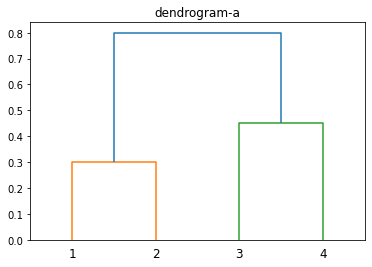

In [27]:
d_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
link_mat = linkage(squareform(d_mat), "complete")
plt.title("dendrogram-a")
dendrogram(link_mat, labels=["1", "2", "3", "4"])
plt.show()

#### (b) Repeat (a), this time using single linkage clustering.

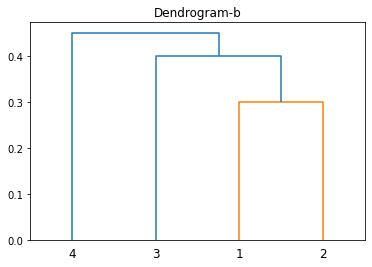

In [28]:
l_mat = linkage(squareform(d_mat), "single")
plt.title("Dendrogram-b")
dendrogram(l_mat, labels=["1", "2", "3", "4"])
plt.show()

#### (c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?
#### SOLUTION - We will have,
#### Cluster A : with obervations 1 and 2
#### Cluster B : with obervations 3 and 4

#### (d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?
#### SOLUTION - We will have,
#### Cluster A : with obervations 1 ,2 and 3
#### Cluster B : with obervations 4

#### (e) It is mentioned in the chapter that at each fusion in the den- drogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

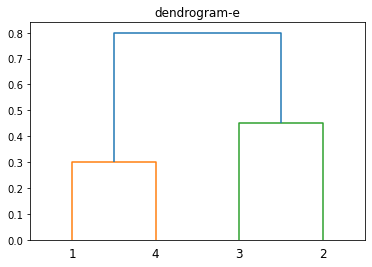

In [29]:
plt.title("dendrogram-e")
dendrogram(link_mat, labels=["1", "4", "3", "2"])
plt.show()

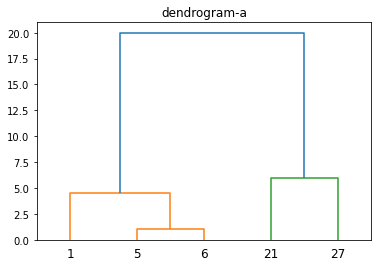

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
d_mat = np.array([[0,4,5,20,26], [4,0,1,16,22], [5,1,0,15,21], [20,16,15,0,6],[26,22,21,6,0]])
link_mat = linkage(squareform(d_mat), "average")
plt.title("dendrogram-a")
dendrogram(link_mat, labels=["1", "5", "6", "21","27"])
plt.show()

#### References/Links

[1] - https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

[2] - https://gist.github.com/jamespaultg/a1b121ed3d4418f65af0973d07ff92c7

[3] - https://stackoverflow.com/questions/43366561/use-sklearns-gridsearchcv-with-a-pipeline-preprocessing-just-once/55401454#55401454

[4] - https://datascience.stackexchange.com/questions/43947/c-parameter-error-in-pipeline

[5] - https://stackoverflow.com/questions/68512916/convergence-warning-linear-svc-increase-the-number-of-iterations

[6] - https://www.statology.org/hamming-distance-python/

[7] - https://www.linkedin.com/pulse/hamming-score-multi-label-classification-chandra-sharat/

[8] - https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/#:~:text=Silhouette%20score%20is%20used%20to,each%20sample%20of%20different%20clusters